In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
df = pd.read_excel(r"E:\Data Science\Assignment2\loan_data.xlsx")
print(df)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [11]:
x = df[['Sex','Age','Time_at_address','Res_status','Telephone','Occupation','Job_status','Time_employed','Time_bank','Liab_ref','Acc_ref','Home_Expn','Balance']]
y = df[['Decision']]
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [12]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [41]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision'], use_cat_names=True)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_encoded = encoder.fit_transform(df)
train_encoded.head()

,Sex_M,Sex_F,Age,Time_at_address,Res_status_owner,Res_status_rent,Telephone_given,Telephone_not_given,Occupation_unemploye,Occupation_labourer,...,Time_employed,Time_bank,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_,Home_Expn,Balance,Decision_reject,Decision_accept
0,1,0,50.750000,0.585,1,0,1,0,1,0,...,0,0,1,0,1,0,145,0,1,0
1,1,0,19.670000,10.000,0,1,0,1,0,1,...,0,0,0,1,1,0,140,0,1,0
2,0,1,52.830002,15.000,1,0,1,0,0,0,...,5,14,1,0,1,0,0,2200,0,1
3,1,0,22.670000,2.540,0,1,0,1,0,0,...,2,0,1,0,1,0,0,0,0,1
4,1,0,29.250000,13.000,1,0,1,0,0,0,...,0,0,1,0,1,0,228,0,1,0


In [91]:
x1=train_encoded[['Age','Time_at_address','Home_Expn','Balance','Time_bank','Time_employed']]
y1=train_encoded[['Decision_accept']]

In [92]:
model=LogisticRegression()
model.fit(x1,y1)

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
model.classes_

array([0, 1], dtype=int64)

In [94]:
model.intercept_

array([-1.21213817])

In [95]:
model.coef_

array([[-0.00320505,  0.0031837 , -0.00084412,  0.00037871,  0.33816484,
         0.26503446]])

In [96]:
 model.predict_proba(x1)

array([[8.16876783e-01, 1.83123217e-01],
       [7.96006784e-01, 2.03993216e-01],
       [3.83811657e-03, 9.96161883e-01],
       [6.78446385e-01, 3.21553615e-01],
       [8.11066751e-01, 1.88933249e-01],
       [7.33369487e-01, 2.66630513e-01],
       [7.30513115e-01, 2.69486885e-01],
       [6.58207048e-01, 3.41792952e-01],
       [7.57785172e-01, 2.42214828e-01],
       [7.59344173e-01, 2.40655827e-01],
       [4.68430744e-02, 9.53156926e-01],
       [8.00419956e-01, 1.99580044e-01],
       [4.96359986e-01, 5.03640014e-01],
       [8.14264060e-01, 1.85735940e-01],
       [3.69303287e-03, 9.96306967e-01],
       [7.40889084e-01, 2.59110916e-01],
       [4.28451918e-01, 5.71548082e-01],
       [8.06485423e-01, 1.93514577e-01],
       [8.02894382e-01, 1.97105618e-01],
       [5.97589210e-02, 9.40241079e-01],
       [3.81522648e-01, 6.18477352e-01],
       [8.07543154e-01, 1.92456846e-01],
       [5.95267042e-01, 4.04732958e-01],
       [6.10222384e-01, 3.89777616e-01],
       [3.675176

In [97]:
model.predict(x1)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [98]:
model.score(x1, y1)

0.7738927738927739

C:\Users\parjita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


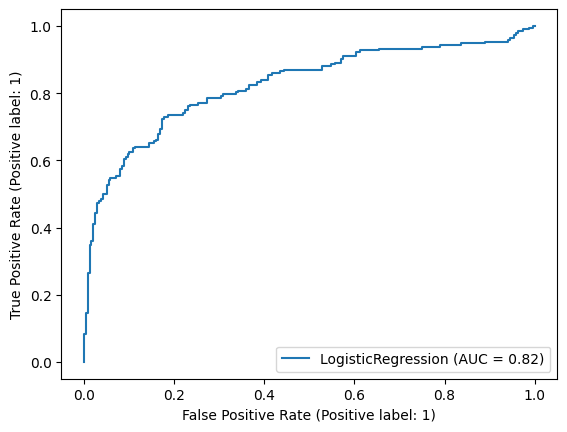

In [100]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x1, y1)